In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class StochasticProcess():
    
    def __init__(self,x0=0):
        assert (type(x0)==float or type(x0)==int or x0 is None)        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):

        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):            
            yi = np.random.choice([1,-1])
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):       
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            yi = np.random.normal()
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def stock_price(
                    self,
                    s0=100,
                    mu=0.2,
                    sigma=0.68,
                    deltaT=52,
                    dt=0.1):
 
        n_step = int(deltaT/dt)
        time_vector = np.linspace(0,deltaT,num=n_step)

        stock_var = (mu-(sigma**2/2))*time_vector

        self.x0=0

        weiner_process = sigma*self.gen_normal(n_step)

        s = s0*(np.exp(stock_var+weiner_process))
        
        return s

In [3]:
sp = StochasticProcess()

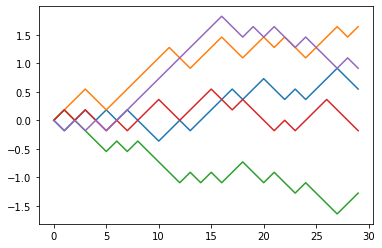

In [4]:
for i in range(5):
    plt.plot(sp.gen_random_walk(30))
plt.show()

In [5]:
sp = StochasticProcess(20)

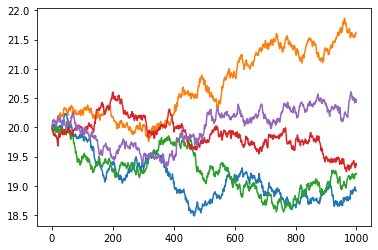

In [7]:
for i in range(5):
    plt.plot(sp.gen_normal(1000))
plt.show()

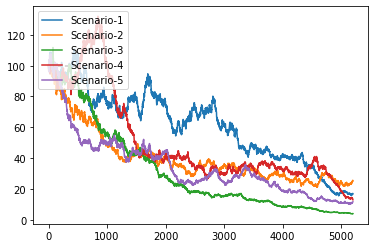

In [8]:
for i in range(5):
    plt.plot(sp.stock_price(mu=0.2,
                           sigma=0.7,
                           dt=0.01))
plt.legend(['Scenario-'+str(i) for i in range(1,6)],
           loc='upper left')
plt.hlines(y=100,xmin=0,xmax=520,
           linestyle='--',color='k')
plt.show()